In [313]:
from src.utils.image_processing import image_diff
from matplotlib import pyplot as plt
import numpy as np
import cv2
from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor

inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'

In [314]:
def sobel(img):
    img = np.array(img, dtype=np.float32)
    mask_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    mask_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    g_x = cv2.filter2D(img,-1, mask_x)
    g_y = cv2.filter2D(img,-1, mask_y)
    grad_abs = np.sqrt(np.square(g_x) + np.square(g_y))
    return grad_abs


def previtt(img):
    img = np.array(img, dtype=np.float32)
    mask_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    mask_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

    g_x = cv2.filter2D(img,-1, mask_x)
    g_y = cv2.filter2D(img, -1,mask_y)
    grad_abs = np.sqrt(np.square(g_x) + np.square(g_y))
    return grad_abs

def laplassian(img):
    img = np.array(img, dtype=np.float32)
    mask = np.array([[-1, -1, -1], [-1, 8 , -1], [-1, -1, -1]]) 
    processed_image = cv2.filter2D(img,-1, mask) 
    
    return processed_image  

def laplassian_bir(img):
    img = np.array(img, dtype=np.float32)
    mask = np.array([[-1, -1, -1], [-1, 9 , -1], [-1, -1, -1]]) 
    processed_image = cv2.filter2D(img,-1, mask) 
    return processed_image
    

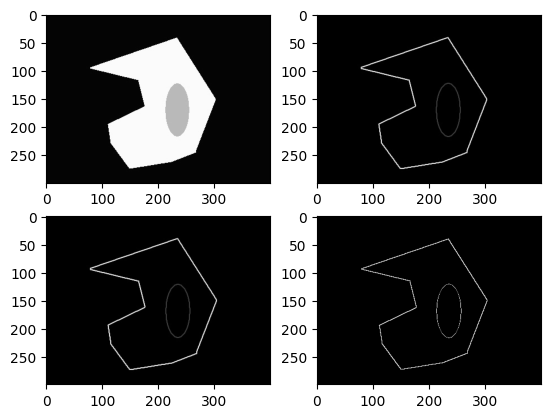

In [315]:
img = inout.read_jpg(img_path+'MODELimage.jpg')
fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(img, 'gray')

sobel_img = sobel(img)
ax[0, 1].imshow(sobel_img, 'gray')

previtt_img = sobel(img)
ax[1, 0].imshow(previtt_img, 'gray')

laplass_img = laplassian(img)
ax[1, 1].imshow(cv2.threshold(laplass_img, 100, 255, cv2.THRESH_BINARY)[1], 'gray')


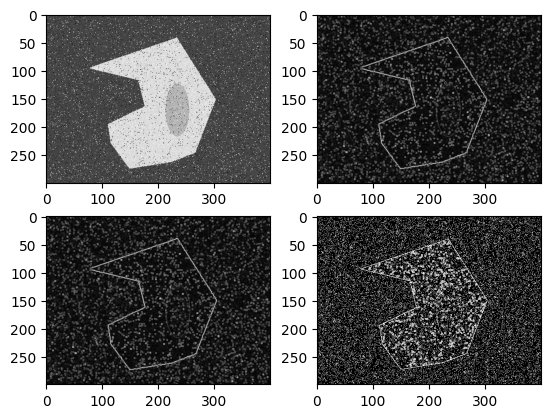

In [316]:
img = inout.read_jpg(img_path+'mixed_MODELimage.jpg')

fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(img, 'gray')

sobel_img = sobel(img)
ax[0, 1].imshow(sobel_img, 'gray')

previtt_img = sobel(img)
ax[1, 0].imshow(previtt_img, 'gray')

laplass_img = laplassian(img)
ax[1, 1].imshow(cv2.threshold(laplass_img, 100, 255, cv2.THRESH_BINARY)[1], 'gray')

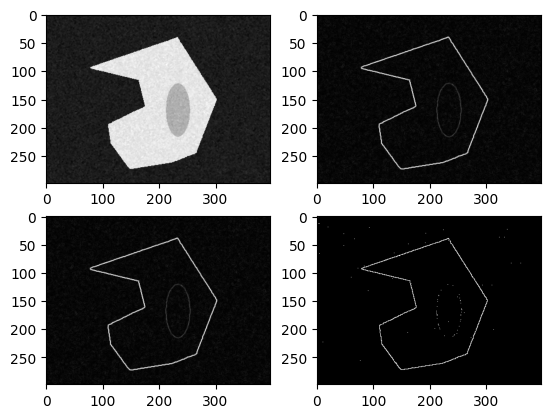

In [317]:
img = inout.read_jpg(img_path+'mixed_median_MODELimage.jpg')

fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(img, 'gray')

sobel_img = sobel(img)
ax[0, 1].imshow(sobel_img, 'gray')

previtt_img = sobel(img)
ax[1, 0].imshow(previtt_img, 'gray')

laplass_img = laplassian(img)
ax[1, 1].imshow(cv2.threshold(laplass_img, 100, 255, cv2.THRESH_BINARY)[1], 'gray')

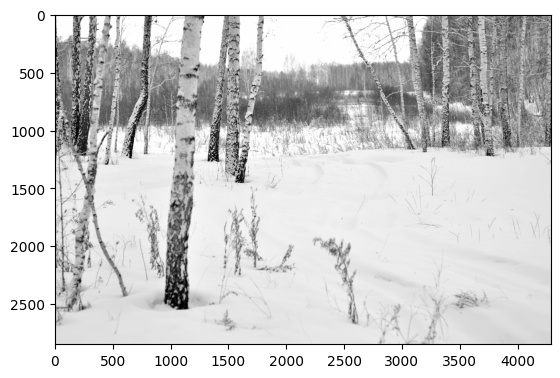

In [318]:
img = inout.read_jpg(img_path+'birches.jpg')

inout.show_jpg(img)

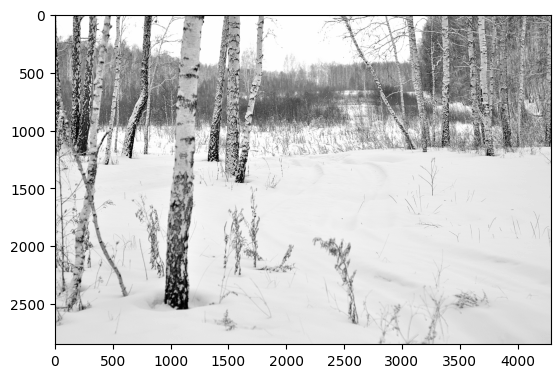

In [319]:
laplass_img = laplassian_bir(img)
inout.show_jpg(np.clip(laplass_img, 0, 255))